###Feature map models with time-space-feature-seperable weighting functions
Here we're going to code up models with the following form:

$$r_t = \sum_{\tau}\sum_{\textbf{x},\Phi} \phi(t-\tau, \textbf{x}, \Phi | \textbf{S}_t)w(\tau,\textbf{x}, \Phi|W)+\epsilon$$

Where $r_t$ is the response of some neural unit at time $t$, $\phi$ is a nonlinear feature map that is a function of time $t$, space $\textbf{x}$, other features $\Phi$, and a set stimuli $\textbf{S}_t$ presented in the some temporal interval ending at $t$. The weighting function $w$ depends upon a temporal offset (i.e., a lag) $\tau$ and a set of shape parameters $W$.

Our goal will be to infer the optimal $W$ for each neural units. Note that the feature maps vary across stimuli, but not across voxels/neurons. Meanwhile, the weighting function varies across voxels/neuron, but does not vary across stimuli.

We're going to be especially interested in weighting functions that are the product of separate functions over time-shift ($\tau$), space, and features. That is, we'll focus on functions like:

$$w(\tau,\textbf{x}, \Phi|W_{\tau},W_{\textbf{x}},W_{\Phi}) = w(\tau|W_{\tau})*w(\textbf{x}|W_{\textbf{x}})*w(\Phi|W_{\Phi})$$ 

These seperable weighting functions are awesome because we only have a few parameters to tune, and they are generally interpretable.

In [59]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.filter import gabor_kernel

Populating the interactive namespace from numpy and matplotlib


####Construct a feature map function
We'll go with Gabors

In [9]:
pixel_per_deg = 34.751
pixels_per_stimulus = 768 ##I just know this
cycles_per_pixel = np.linspace(0.000288,0.083451,num=10)  ##cyc/pix
cycles_per_fwhm = 1.0
fwhms_per_kernel = 1.5

metrics = {'cycles per pixel':cycles_per_pixel,
           'pixels per cycle': 1./cycles_per_pixel,
           'cycles per stimulus': cycles_per_pixel*pixels_per_stimulus,
           'cycles per deg.': cycles_per_pixel*pixel_per_deg,
           'fwhm (pix)': np.clip(cycles_per_fwhm/cycles_per_pixel,0,pixels_per_stimulus),
           'prf_size (deg)': np.clip(cycles_per_fwhm/cycles_per_pixel,0,pixels_per_stimulus)/pixel_per_deg/2.,
           'n_pix': np.clip(fwhms_per_kernel*cycles_per_fwhm/cycles_per_pixel,0,pixels_per_stimulus)}

fm = pd.DataFrame(metrics)
fm

,cycles per deg.,cycles per pixel,cycles per stimulus,fwhm (pix),n_pix,pixels per cycle,prf_size (deg)
0,0.010008,0.000288,0.221184,768.000000,768.000000,3472.222222,11.050042
1,0.331119,0.009528,7.317760,104.950149,157.425223,104.950149,1.510031
2,0.652230,0.018769,14.414336,53.280290,79.920435,53.280290,0.766601
3,0.973341,0.028009,21.510912,35.702810,53.554215,35.702810,0.513695
4,1.294452,0.037249,28.607488,26.846118,40.269177,26.846118,0.386264
5,1.615562,0.046490,35.704064,21.510156,32.265235,21.510156,0.309490
6,1.936673,0.055730,42.800640,17.943657,26.915485,17.943657,0.258175
7,2.257784,0.064970,49.897216,15.391640,23.087460,15.391640,0.221456
8,2.578895,0.074211,56.993792,13.475152,20.212728,13.475152,0.193881
9,2.900006,0.083451,64.090368,11.983080,17.974620,11.983080,0.172413


In [81]:
foo = gabor_kernel(np.pi/4.,sigma_x=1,sigma_y=1)
foo.shape

(7, 7)

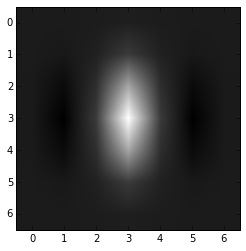

In [82]:
plt.imshow(np.real(foo),cmap='gray')
plt.show()

In [ ]:
ripple_kernels = []
for _,row in fm.iterrows():
    fwhm = int(row['fwhm (pix)'])
    n_pix = int(row['n_pix'])
    freq = row['cycles per pixel']*n_pix
    ripple_kernels.append(complex_ripple_filter(freq,(0,0),fwhm,n_pix))

####Construct a weighting function

####Construct prediction function (use tensordot)

####Construct a learner

####Obtain some images

####Generate feature maps (use einsum)

####Construct fake neural units with fake parameters

####Use learner to recover fake parameters.